In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Copper_Set.xlsx - Result 1.csv")
df

C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\592123409.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
#checking for valid datatypes
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [4]:
#converting the features to requied data type
df["quantity tons"]=pd.to_numeric(df["quantity tons"],errors="coerce")    
df["item_date"]=pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date

In [5]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
# replacing null values with unknown instead of deleting it
df['material_ref'].fillna('unknown', inplace=True)

#deleting null values
df=df.dropna()

In [7]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [8]:
df1=df.copy()


In [9]:
# removing values less than 0
a= df1['selling_price'] <= 0
print(a.sum())
df1.loc[a, 'selling_price'] = np.nan

b= df1['quantity tons'] <= 0
print(b.sum())
df1.loc[b, 'quantity tons'] = np.nan

c= df1['thickness'] <= 0
print(c.sum())

7
4
0


C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\1444477889.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['selling_price_log'])


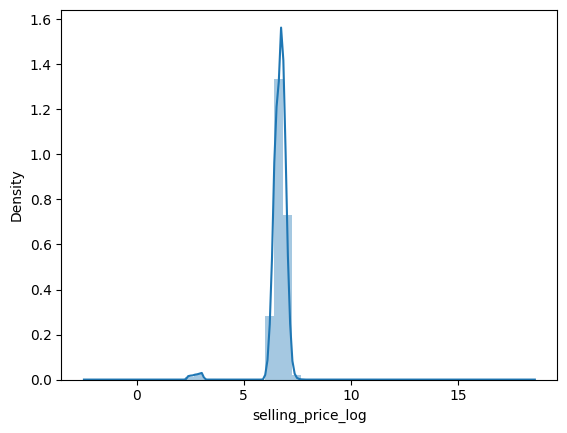

C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\1444477889.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['quantity tons_log'])


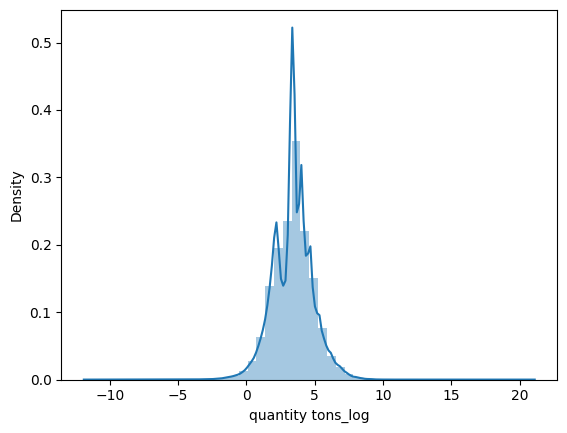

C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\1444477889.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['thickness_log'])


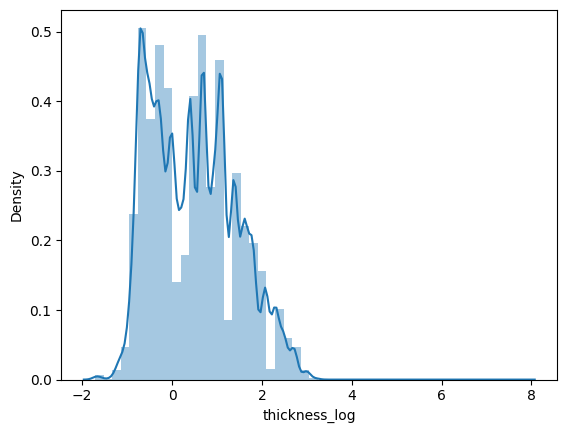

In [10]:
#Taking the log of data to obtain normal distribution 
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()

df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()


df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()


In [11]:
#using ordinal encoder to convert the categorical data to numerical data.
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df1["status"] = oe.fit_transform(df1[['status']])
df1["item type"] = oe.fit_transform(df1[['item type']])


In [12]:
df1=df1.dropna()

In [13]:
#split data into X, y
X=df1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']


In [14]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41507219,  0.70619809,  0.82144809, ..., -0.6922447 ,
        -0.75772522,  1.66791756],
       [ 2.25044336,  0.70619809,  0.82144809, ..., -0.8151733 ,
        -0.29404358,  1.66499495],
       [ 1.77454648,  0.70619809,  1.76912069, ..., -0.6102923 ,
        -0.78104355, -0.65974356],
       ...,
       [ 1.34670497,  0.70619809,  0.82144809, ..., -0.8151733 ,
        -0.31476656, -0.43186062],
       [-1.34847183,  0.70619809,  0.82144809, ..., -0.8151733 ,
        -0.31476656, -0.43186062],
       [ 1.81044632,  0.70619809,  0.82144809, ..., -0.8151733 ,
        -0.31476656, -0.43186062]])

In [15]:
#splitting the data setto training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127135, 9)
(54487, 9)
(127135,)
(54487,)


In [16]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08366106187662226
0.08389037601389149


In [17]:
#RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8797242942838541
0.8735240127545556


In [18]:
# GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7680209029144247
0.7634545550640435


In [19]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
gs = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
gs.fit(X_train, y_train)
print("Best hyperparameters:", gs.best_params_)
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [22]:
#check metrics
from sklearn import metrics

#check MSE
print(metrics.mean_squared_error(y_test,y_pred))


#check MAE
print(metrics.mean_absolute_error(y_test, y_pred))



#R2 Score
print(metrics.r2_score(y_test,y_pred))



0.03372590613132925
0.1241420269051244
0.8969218133528556


# classification

In [24]:
df2 = df.copy()

In [23]:
df.status.value_counts()

status
Won                116005
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4168
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [27]:
df2= df[df['status'].isin(['Won', 'Lost'])]


In [28]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
df2.status = OE.fit_transform(df2[['status']])
df2['item type'] = OE.fit_transform(df2[['item type']])

C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\290060581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.status = OE.fit_transform(df2[['status']])
C:\Users\goutham\AppData\Local\Temp\ipykernel_13804\290060581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['item type'] = OE.fit_transform(df2[['item type']])


In [30]:
#split data into X, y
X = df2[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = df2['status']

In [31]:
#apply standard scaler
SS.fit_transform(X)

array([[-0.09139372,  0.09705626,  0.76979662, ..., -0.7101691 ,
        -0.72507885,  1.66736482],
       [ 1.52756365,  0.76054546,  0.76979662, ..., -0.83267806,
        -0.28354978,  1.66444114],
       [ 0.66147938, -0.62374053,  1.72295659, ..., -0.62849646,
        -0.74728313, -0.66115372],
       ...,
       [-0.20459462, -0.71081919,  0.76979662, ..., -0.83267806,
        -0.30328271, -0.43318683],
       [-4.74989724, -0.77269902,  0.76979662, ..., -0.83267806,
        -0.30328271, -0.43318683],
       [ 0.70810314, -0.75207241,  0.76979662, ..., -0.83267806,
        -0.30328271, -0.43318683]])

In [32]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105305, 9)
(45131, 9)
(105305,)
(45131,)


In [34]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#DecisionTreeClassifier 

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))


0.807815393381131
0.8092663579357869


In [35]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8184891505626514
0.8193924353548558


In [36]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9228336736147381
0.8895437725731759


In [37]:
#RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.818973458050425
0.8186390729210521


In [38]:
#lr = LogisticRegression()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7716442714021177
0.7699142496288582


In [45]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)


y_predict = xgb_model.predict(X_test)

C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:38:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.6120909250922693

In [46]:
y_predict = xgb_model.predict(X_test)

In [47]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9282754647581485


In [49]:
y_pred= knn.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8239,  2145],
       [ 2840, 31907]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc

#check accuracy score.
print(accuracy_score(y_test, y_pred))

print(f1_score(y_test,y_pred, average = 'macro'))



#plot_confusion_matrix(knn, X_test, y_test);



0.8895437725731759
0.8476411914141125


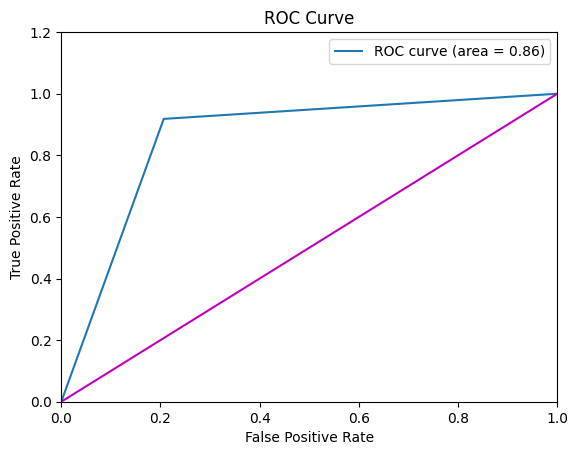

In [58]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.77     10384
         1.0       0.94      0.92      0.93     34747

    accuracy                           0.89     45131
   macro avg       0.84      0.86      0.85     45131
weighted avg       0.89      0.89      0.89     45131

